In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.model_selection import train_test_split

In [2]:
# cols - 900 for training, 100 for testing # 10 lines - 1000 columns
# def path_to_txt(file_path, num_unique=100):
#     file = open(file_path, "r")
#     line_arr = []
#     for line in file:
#         line_arr.append(line.split("\n")[0])
    
#     with open('Q2_training.csv', 'w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
        
#         for row_arg in range(1000):
#             values = []
#             for col_arg in range(10):
#                 values.append(line_arr[col_arg][row_arg])
#             # write values to file
#             writer.writerow(values)
   
# file_path = "ps2_data/pset2_Q2_data/hw.2-1.txt"
# path_to_txt(file_path)

### Logistic Regression

In [3]:
def get_train_labels(train_file):
    # Train df
    train_df = pd.read_csv(train_file, header=None)
    shuffled_train_df = train_df.sample(frac=1)
    # Test df
#     test_df = pd.read_csv(test_file, header=None)
#     shuffled_test_df = test_df.sample(frac=1)
    
    # Get train - x, y
    train_data_y = shuffled_train_df.iloc[:, -1].to_numpy()
    train_data_x = shuffled_train_df.drop(shuffled_train_df.columns[-1], axis=1).to_numpy()
    # Get test - x, y
#     test_data_y = shuffled_test_df.iloc[:, -1].to_numpy()
#     test_data_x = shuffled_test_df.drop(shuffled_test_df.columns[-1], axis=1).to_numpy()
    return (train_data_x, train_data_y)

train_file = "Q2_training.csv"

train, labels  = get_train_labels(train_file)

In [4]:
# train.shape

In [5]:
labels.shape

(1000,)

#### Problem - 2d

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import csv
from sklearn.model_selection import train_test_split
from scipy import special

In [7]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iter=50):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = 0

    """
    z is dot product of features and weights, which is then mapped to discrete values, such as between 0 and 1
    """
    def sigmoid(self, z):
        return 1.0/(1+np.exp(-z))

    def predict(self, x_features, weights):
        """Returns 1d array of probabilities"""
        z = np.dot(x_features, weights)
        return self.sigmoid(z)

    def nll_cost(self, x_features, labels, weights):
        predictions = self.predict(x_features, weights)
        NLL = -special.xlogy(labels, predictions) - special.xlogy(1-labels, 1-predictions)
        NLL[NLL == -np.inf] = 0
        NLL[NLL == np.inf] = 0
        return NLL.sum()/len(x_features)
    
    def calc_nll_gradient(self, x_features, labels, weights):
        predictions = self.predict(x_features, weights)
        gradient = 0
        for i in range(x_features.shape[0]):
            gradient += np.dot(x_features[i], labels[i] - predictions[i])
        gradient *= -1
        return gradient

    def give_predictions(self, x_features):
        linear_model_prediction =  self.predict(x_features, self.weights)
        y_predicted_cls = [1 if i>0.5 else 0 for i in linear_model_prediction]
        return y_predicted_cls

    def accuracy(self, y_true, y_predicted):
        accuracy = np.sum(y_true==y_predicted)/len(y_true)
        return accuracy

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features) #initialize the weight matrix
        nll_costs = []
        for i in range(self.n_iter):
            NLL = self.nll_cost(features, labels, self.weights) # Get NLL cost
            gradients = self.calc_nll_gradient(features, labels, self.weights) # Compute derivatives
            self.weights -= self.lr*gradients
            nll_costs.append(NLL)
            #Log process
#             if i%1000 == 0:
#                 print("iter: {}, cost: {}".format(str(i),str(NLL)))
        return nll_costs

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

x_train = sc_X.fit_transform(train)

In [9]:
step_sizes = [10**-i for i in range(1, 6)]
num_iters = [i for i in range(1, 51)]

print(step_sizes)

[0.1, 0.01, 0.001, 0.0001, 1e-05]


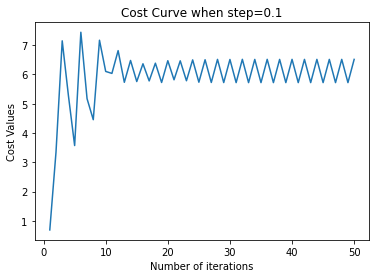

In [10]:
model = LogisticRegression(lr=step_sizes[0], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[0]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

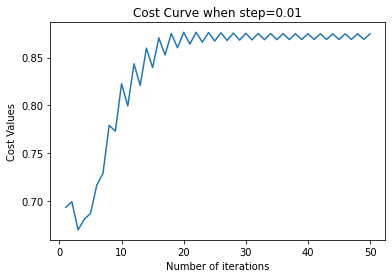

In [11]:
model = LogisticRegression(lr=step_sizes[1], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[1]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

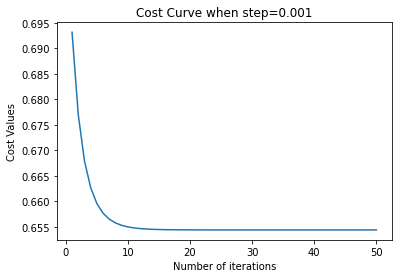

In [12]:
model = LogisticRegression(lr=step_sizes[2], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[2]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

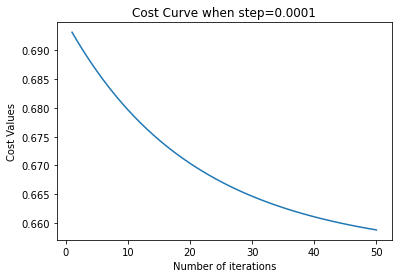

In [13]:
model = LogisticRegression(lr=step_sizes[3], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[3]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

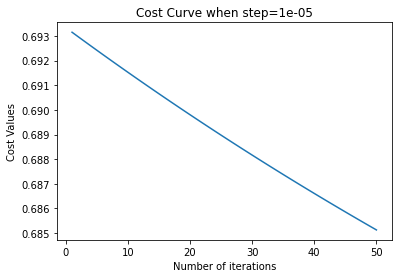

In [14]:
model = LogisticRegression(lr=step_sizes[4], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[4]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

#### Problem 2d-b (Newton's method)

In [26]:
class LogisticRegressionNewton:
    def __init__(self, lr=0.001, n_iter=50):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = 0

    """
    z is dot product of features and weights, which is then mapped to discrete values, such as between 0 and 1
    """
    def sigmoid(self, z):
        return 1.0/(1+np.exp(-z))

    def predict(self, x_features, weights):
        """Returns 1d array of probabilities"""
        z = np.dot(x_features, weights)
        return self.sigmoid(z)

    def nll_cost(self, x_features, labels, weights):
        predictions = self.predict(x_features, weights)
        NLL = -special.xlogy(labels, predictions) - special.xlogy(1-labels, 1-predictions)
        NLL[NLL == -np.inf] = 0
        NLL[NLL == np.inf] = 0
        return NLL.sum()/len(x_features)
    
    def calc_nll_gradient(self, x_features, labels, weights):
        predictions = self.predict(x_features, weights)
        gradient = 0
        for i in range(x_features.shape[0]):
            gradient += np.dot(x_features[i], labels[i] - predictions[i])
        gradient *= -1
        return gradient

    def give_predictions(self, x_features):
        linear_model_prediction =  self.predict(x_features, self.weights)
        y_predicted_cls = [1 if i>0.5 else 0 for i in linear_model_prediction]
        return y_predicted_cls

    def accuracy(self, y_true, y_predicted):
        accuracy = np.sum(y_true==y_predicted)/len(y_true)
        return accuracy

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features) #initialize the weight matrix
        nll_costs = []
        for i in range(self.n_iter):
            print(self.weights)
            NLL = self.nll_cost(features, labels, self.weights) # Get NLL cost
            gradients = self.calc_nll_gradient(features, labels, self.weights) # Compute derivatives
            h_x = self.predict(features, self.weights)
            # cost = -(1/(np.size(features,0)))*sum(labels*np.log(h_x) + (1-labels)*np.log(1-h_x))
            # grad = (1/(np.size(features,0)))*(features.T.dot((h_x-labels)))
            H = (1/(np.size(features,0)))*(features.T.dot(np.diag(h_x.reshape(np.size(features,0),))).dot(np.diag((1-h_x).reshape(np.size(features,0),))).dot(features))
            self.weights -= np.linalg.pinv(H).dot(gradients)
            nll_costs.append(NLL)
            
        return nll_costs

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ -20.39264789  -75.17932972   48.46291932 -423.28597224 -119.0606749
  106.08060557   70.37673559   85.03017877  -45.67260112  259.29352605]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85

<ipython-input-26-cf511258ec9c>:12: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-z))


[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10  7.41834746e+10 -4.55798996e+10  4.28313320e+11
  1.23326041e+11 -1.11608287e+11 -7.35572301e+10 -8.56285108e+10
  4.17153497e+10 -2.62931348e+11]
[ 2.85954062e+10

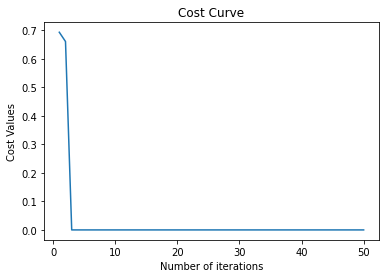

In [27]:
model = LogisticRegressionNewton(lr=step_sizes[0], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve')
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

<ipython-input-15-59ab8a24d7d7>:12: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-z))


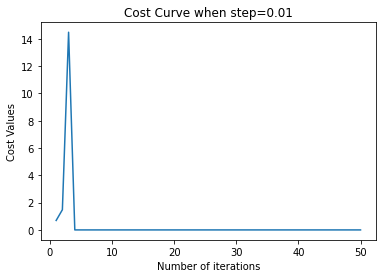

In [17]:
model = LogisticRegressionNewton(lr=step_sizes[1], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[1]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

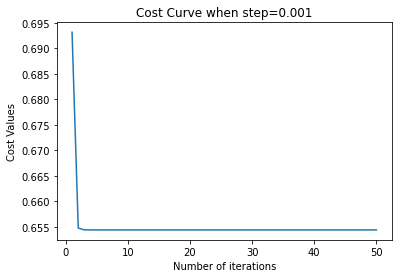

In [18]:
model = LogisticRegressionNewton(lr=step_sizes[2], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[2]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

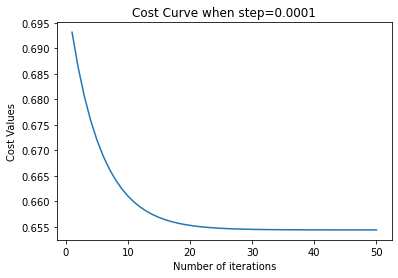

In [19]:
model = LogisticRegressionNewton(lr=step_sizes[3], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[3]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()

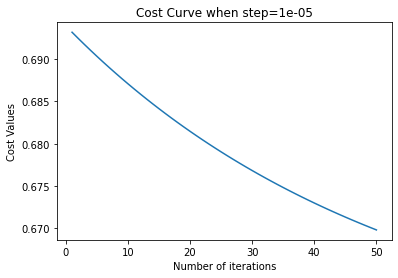

In [20]:
model = LogisticRegressionNewton(lr=step_sizes[4], n_iter=50)
cost_history = model.fit(x_train, labels)
plt.plot(num_iters, cost_history)
plt.title('Cost Curve when step={}'.format(step_sizes[4]))
plt.xlabel("Number of iterations")
plt.ylabel("Cost Values")
plt.show()